In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [2]:
dataset, info = tfds.load('horses_or_humans', split='train', with_info=True)

In [3]:
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\G35CG SKU3\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


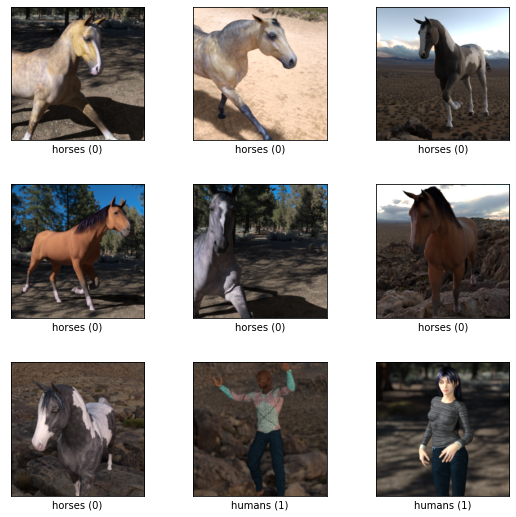

In [4]:
fig = tfds.show_examples(dataset, info)

In [5]:
(ds_train, ds_val, ds_test), ds_info= tfds.load('horses_or_humans', split=('train[:80%]', 'train[80%:]', 'test'), as_supervised=True, with_info=True)

In [6]:
print(len(ds_train), len(ds_val), len(ds_test))

822 205 256


In [7]:
ds_train = ds_train.shuffle(len(ds_train)).batch(64)
ds_val = ds_val.batch(64)
ds_test = ds_test.batch(64)

In [8]:
#MLP
model = Sequential()
model.add(Flatten(input_shape=(300, 300, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 512)               138240512 
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 138,241,025
Trainable params: 138,241,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(ds_train, epochs=50, validation_data=ds_val)

Epoch 1/50
13/13 [==============================] - 1s 39ms/step - loss: 57268.7109 - accuracy: 0.5243 - val_loss: 50600.0781 - val_accuracy: 0.4341
Epoch 2/50
13/13 [==============================] - 0s 25ms/step - loss: 18184.7148 - accuracy: 0.5341 - val_loss: 2215.3101 - val_accuracy: 0.7268
Epoch 3/50
13/13 [==============================] - 0s 26ms/step - loss: 4412.2554 - accuracy: 0.6545 - val_loss: 966.2347 - val_accuracy: 0.8341
Epoch 4/50
13/13 [==============================] - 0s 26ms/step - loss: 1358.2804 - accuracy: 0.8224 - val_loss: 495.8559 - val_accuracy: 0.8878
Epoch 5/50
13/13 [==============================] - 0s 26ms/step - loss: 669.7480 - accuracy: 0.8370 - val_loss: 375.1894 - val_accuracy: 0.8927
Epoch 6/50
13/13 [==============================] - 0s 25ms/step - loss: 569.7906 - accuracy: 0.8710 - val_loss: 368.0974 - val_accuracy: 0.8829
Epoch 7/50
13/13 [==============================] - 0s 26ms/step - loss: 306.7391 - accuracy: 0.9063 - val_loss: 267.4813

In [10]:
#CNN
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(300, 300, 3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten(input_shape=(300, 300, 3)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)      

In [11]:
history2 = model2.fit(ds_train, epochs=50, validation_data=ds_val)

Epoch 1/50
13/13 [==============================] - 3s 107ms/step - loss: 729.2361 - accuracy: 0.5852 - val_loss: 17.6216 - val_accuracy: 0.6341
Epoch 2/50
13/13 [==============================] - 1s 49ms/step - loss: 3.1851 - accuracy: 0.8954 - val_loss: 2.0542 - val_accuracy: 0.9171
Epoch 3/50
13/13 [==============================] - 1s 49ms/step - loss: 0.7910 - accuracy: 0.9647 - val_loss: 0.4867 - val_accuracy: 0.9512
Epoch 4/50
13/13 [==============================] - 1s 49ms/step - loss: 0.0834 - accuracy: 0.9903 - val_loss: 0.2214 - val_accuracy: 0.9756
Epoch 5/50
13/13 [==============================] - 1s 48ms/step - loss: 0.0141 - accuracy: 0.9939 - val_loss: 0.4809 - val_accuracy: 0.9707
Epoch 6/50
13/13 [==============================] - 1s 50ms/step - loss: 8.5778e-04 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9902
Epoch 7/50
13/13 [==============================] - 1s 49ms/step - loss: 2.1417e-04 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 0.9902
E

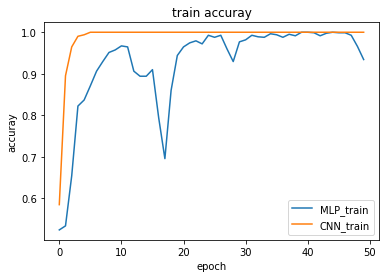

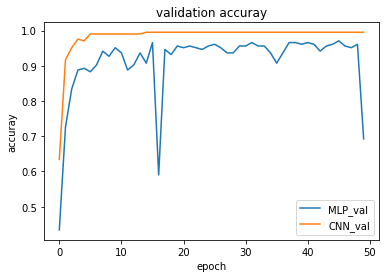

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('train accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['MLP_train', 'CNN_train'])
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('validation accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['MLP_val', 'CNN_val'])
plt.show()


In [13]:
score = model.evaluate(ds_test)
score2 = model2.evaluate(ds_test)
print("MLP_score:", score)
print("CNN_score:", score2)

4/4 [==============================] - 0s 17ms/step - loss: 12.5961 - accuracy: 0.8242
MLP_score: [10849.181640625, 0.51953125]
CNN_score: [12.59613037109375, 0.82421875]
